In [1]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.ndimage.interpolation import shift
from sklearn import preprocessing

from ssqueezepy.visuals import plot, imshow

import nbimporter
from lib import *

import gym
import gym_env
from stable_baselines3 import TD3, A2C, DDPG, SAC, PPO, HerReplayBuffer
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import results_plotter

from torch.nn import functional as F
import torch as th

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

In [2]:
algorithms = {
    "td3" : TD3,
    "a2c" : A2C,
    "ddpg" : DDPG,
    "sac" : SAC,
    "ppo" : PPO,
}

# Data settings and gathering

In [10]:
#df = pd.read_csv('../../data/thm/processed_thermal_data.csv')
df = pd.read_csv('../../data/eps/processed_test_power_measurements_2.csv')

# Creating Sigmoid
#increase = 200
#increase_gradient = 100
#x = np.linspace(-increase_gradient, increase_gradient, len(df))
#sigmoid = 1/(1 + np.exp(-x-20))*increase
#df["B1_sigmoid"] = df["B1_temp"] + sigmoid 

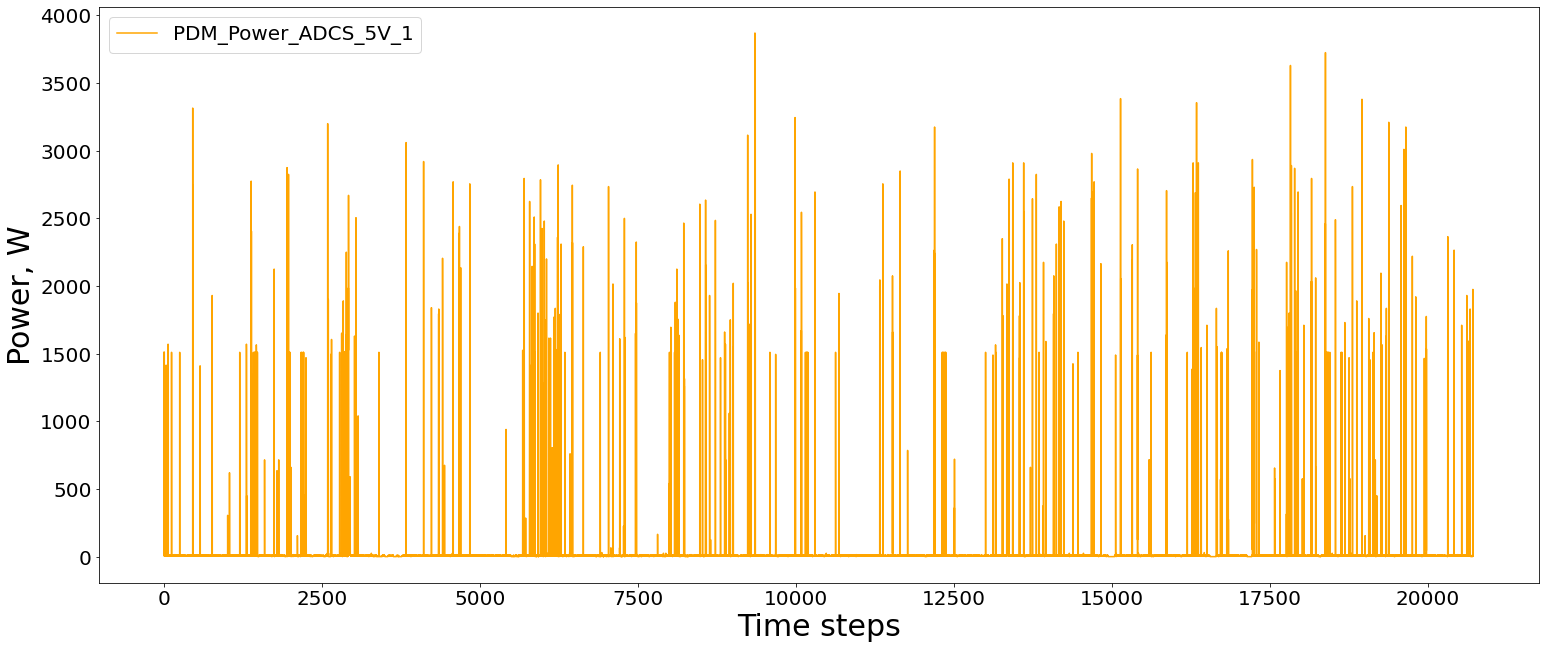

In [16]:
fig = plt.figure(figsize =(25, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
max_xticks = 10
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.plot(df['PDM_Power_ADCS_5V_1'], label="PDM_Power_ADCS_5V_1", color='orange')
ax.set_xlabel('Time steps', fontsize=30)
ax.set_ylabel('Power, W', fontsize=30)
ax.legend(fontsize=20)

In [17]:
test_name = "power_data"
fig.savefig(f"/Users/mykytaprokayev/Documents/TUM/Master Thesis/Presentation_images/{test_name}.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

In [4]:
columns = ["B1_temp"]

data = df[columns].values
if len(columns) ==1:
    data = data.reshape((data.shape[0],))
print(data)

[32.96 33.06 33.12 ... 32.43 32.42 32.46]


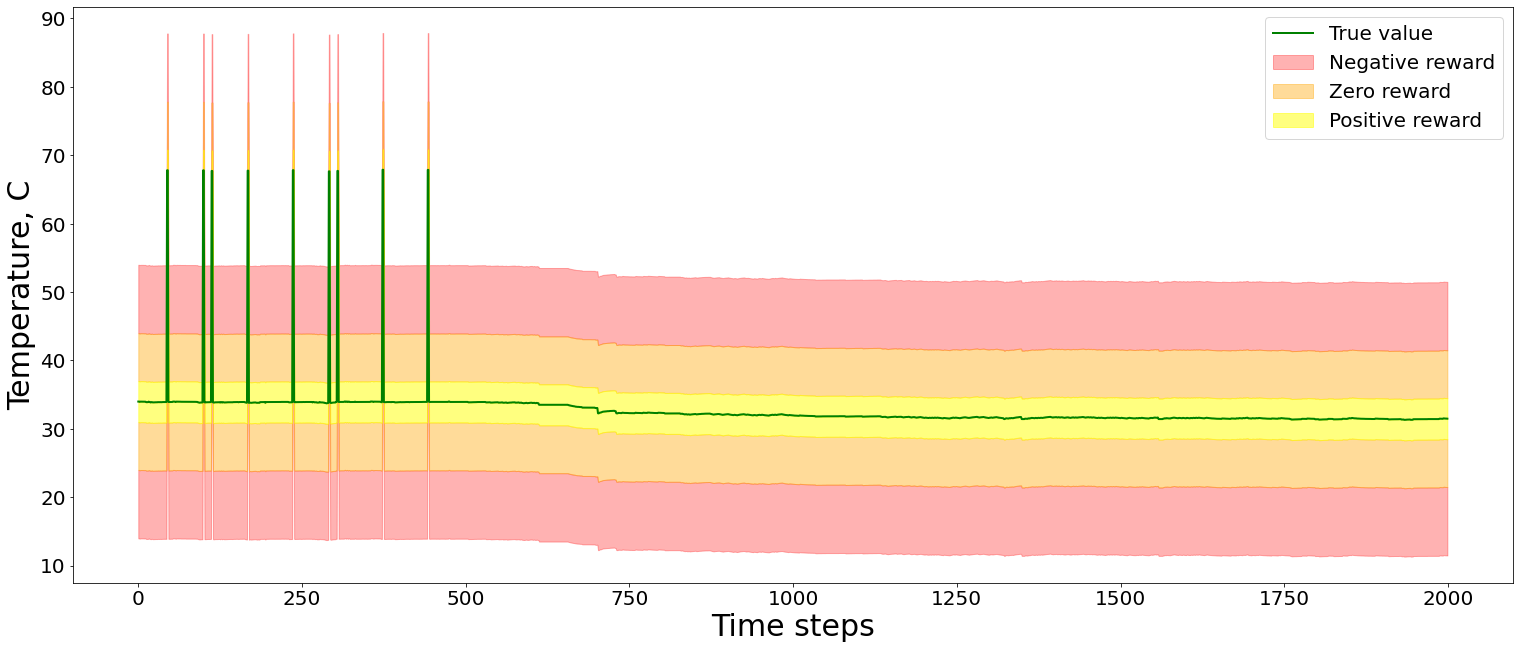

In [14]:
"""limL = 10000
limU = 12000
column = "B1_temp"

df_p = df[limL:limU]

df_p = df_p.reset_index()
data_p = df_p[column].values

band_up_1 = df_p[column].values + 3
band_down_1 = df_p[column].values - 3

band_up_2 = df_p[column].values + 10
band_down_2 = df_p[column].values - 10

band_up_3 = df_p[column].values + 20
band_down_3 = df_p[column].values - 20

fig = plt.figure(figsize =(25, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
max_xticks = 10
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
ax.plot(df_p.index, data_p, label="True value", linewidth=2, color="green")
ax.fill_between(df_p.index, band_up_3, band_up_2, alpha=0.3, color="red", label="Negative reward") 
ax.fill_between(df_p.index, band_down_3, band_down_2, alpha=0.3, color="red") 
ax.fill_between(df_p.index, band_up_2, band_up_1, alpha=0.4, color="orange", label="Zero reward") 
ax.fill_between(df_p.index, band_down_2, band_down_1, alpha=0.4, color="orange")
ax.fill_between(df_p.index, band_up_1, data_p, alpha=0.5, color="yellow", label="Positive reward") 
ax.fill_between(df_p.index, band_down_1, data_p, alpha=0.5, color="yellow") 
ax.set_xlabel('Time steps', fontsize=30)
ax.set_ylabel('Temperature, C', fontsize=30)
ax.legend(fontsize=20)
plt.show()"""

In [15]:
"""test_name = "reward_example"
fig.savefig(f"/Users/mykytaprokayev/Documents/TUM/Master Thesis/latex/images/{test_name}.svg", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')
command = f"/Applications/Inkscape.app/Contents/MacOS/inkscape -D /Users/mykytaprokayev/Documents/TUM/Master\ Thesis/latex/images/{test_name}.svg  -o /Users/mykytaprokayev/Documents/TUM/Master\ Thesis/latex/images/{test_name}.pdf --export-latex"
os.system(command)"""

0

# Reward Calculation

In [22]:
algorithm_name = "ddpg"
algorithm = algorithms[algorithm_name]

episode_length = 100
obs_size = 1
train_timesteps = 100000

log_dir = "tmp/"
env = gym.make("Anomaly-v4", data=data, episode_length=episode_length, obs_size=obs_size)

Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -33.03
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 2000
Best mean reward: -33.03 - Last mean reward per episode: 11.41
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 3000
Best mean reward: 11.41 - Last mean reward per episode: -12.26
Num timesteps: 4000
Best mean reward: 11.41 - Last mean reward per episode: 1.37
Num timesteps: 5000
Best mean reward: 11.41 - Last mean reward per episode: 13.51
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 6000
Best mean reward: 13.51 - Last mean reward per episode: 19.22
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 7000
Best mean reward: 19.22 - Last mean reward per episode: 24.23
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 8000
Best mean rewar

Num timesteps: 82000
Best mean reward: 76.05 - Last mean reward per episode: 64.13
Num timesteps: 83000
Best mean reward: 76.05 - Last mean reward per episode: 63.01
Num timesteps: 84000
Best mean reward: 76.05 - Last mean reward per episode: 63.62
Num timesteps: 85000
Best mean reward: 76.05 - Last mean reward per episode: 65.45
Num timesteps: 86000
Best mean reward: 76.05 - Last mean reward per episode: 65.26
Num timesteps: 87000
Best mean reward: 76.05 - Last mean reward per episode: 62.71
Num timesteps: 88000
Best mean reward: 76.05 - Last mean reward per episode: 65.06
Num timesteps: 89000
Best mean reward: 76.05 - Last mean reward per episode: 66.08
Num timesteps: 90000
Best mean reward: 76.05 - Last mean reward per episode: 66.68
Num timesteps: 91000
Best mean reward: 76.05 - Last mean reward per episode: 66.32
Num timesteps: 92000
Best mean reward: 76.05 - Last mean reward per episode: 66.64
Num timesteps: 93000
Best mean reward: 76.05 - Last mean reward per episode: 68.89
Num 

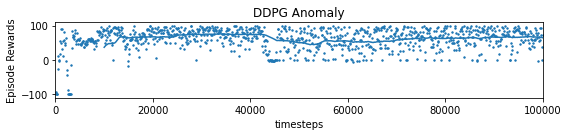

In [24]:
for i in range(0, 1):
    env = gym.make("Anomaly-v4", data=data, episode_length=episode_length, obs_size=obs_size)
    #print(check_env(env))
    env = Monitor(env, log_dir)
    obs = env.reset(force=True)
    model = algorithm('MlpPolicy', env, device="cuda")
    #, train_freq = 8, learning_starts=10000
    callback = SaveOnBestTrainingRewardCallback(check_freq=1000, 
                                                log_dir=log_dir, 
                                                algorithm=algorithm_name, 
                                                column = columns[0],
                                                obs_size = obs_size,
                                                ep_length = episode_length)

    model.learn(total_timesteps=train_timesteps, callback=callback)

    plot_results([log_dir], train_timesteps, results_plotter.X_TIMESTEPS, f"{algorithm_name.upper()} Anomaly")
    plt.show()